# Decision Tree Project

This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict based on diagnostic measures whether or not a patient has diabetes.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from pickle import dump


In [4]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
raw_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
raw_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
raw_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Description

- Pregnancies. Number of pregnancies of the patient (numeric)

- Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)

- BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)

- SkinThickness. Triceps skinfold thickness (measured in mm) (numeric)

- Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)

- BMI. Body mass index (numeric)

- DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)

- Age. Age of patient (numeric)

- Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)

In [7]:
total_data = raw_data.copy()

#### Drop '0' values in columns : 'BloodPressure', 'BMI', 'Glucose', 'SkinThickness'

In [8]:
selected_columns = ['BloodPressure', 'BMI', 'Glucose', 'SkinThickness', 'Insulin']  # Reemplaza 'OtraColumna' con las columnas que desees seleccionar

# Iteramos sobre las columnas seleccionadas
for column in selected_columns:
    total_data = total_data[total_data[column] != 0]
    
total_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [9]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


# Univariant Analysis

### Numeric Analysis

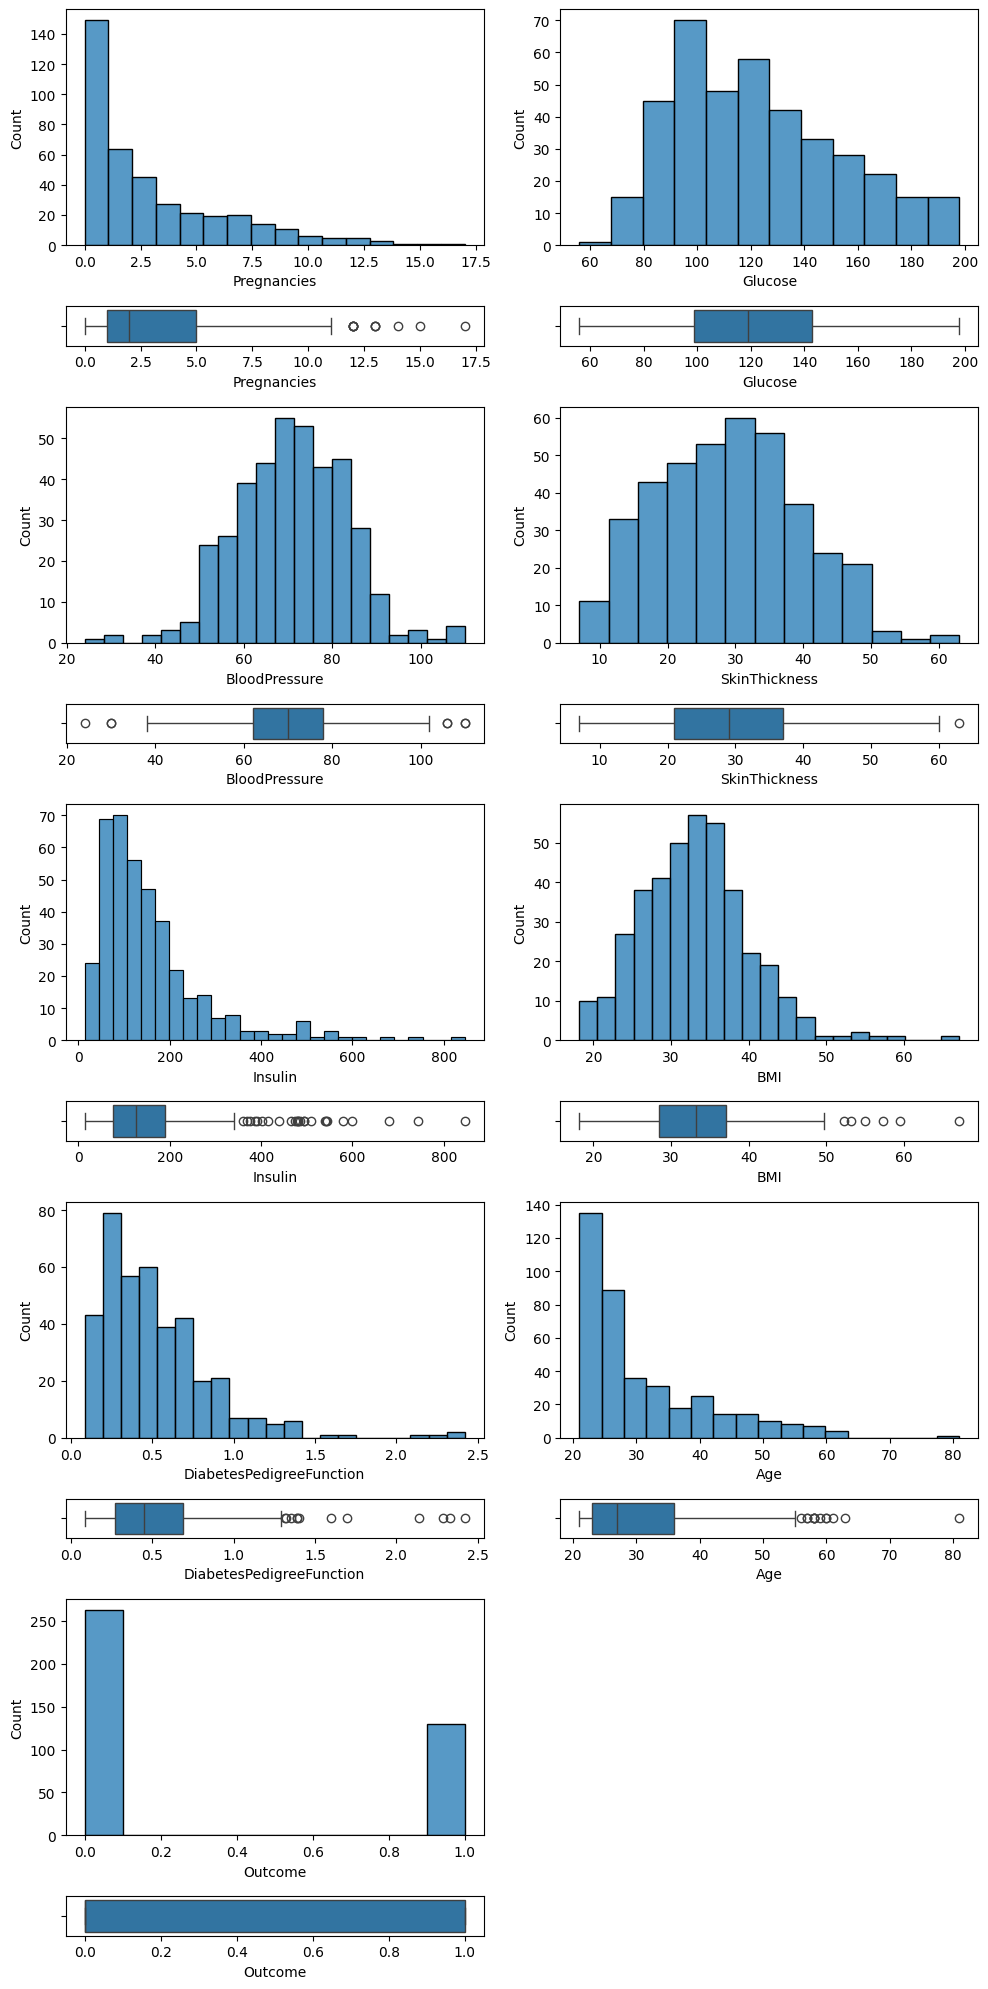

In [9]:
fig, axis = plt.subplots(10, 2, figsize = (10, 20), gridspec_kw={"height_ratios": [6, 1, 6, 1, 6, 1, 6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "Pregnancies")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Pregnancies")

sns.histplot(ax = axis[0, 1], data = total_data, x = "Glucose")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Glucose")

sns.histplot(ax = axis[2, 0], data = total_data, x = "BloodPressure")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "BloodPressure")

sns.histplot(ax = axis[2, 1], data = total_data, x = "SkinThickness")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "SkinThickness")

sns.histplot(ax = axis[4, 0], data = total_data, x = "Insulin")
sns.boxplot(ax = axis[5, 0], data = total_data, x = "Insulin")

sns.histplot(ax = axis[4, 1], data = total_data, x = "BMI")
sns.boxplot(ax = axis[5, 1], data = total_data, x = "BMI")

sns.histplot(ax = axis[6, 0], data = total_data, x = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[7, 0], data = total_data, x = "DiabetesPedigreeFunction")

sns.histplot(ax = axis[6, 1], data = total_data, x = "Age")
sns.boxplot(ax = axis[7, 1], data = total_data, x = "Age")

sns.histplot(ax = axis[8, 0], data = total_data, x = "Outcome")
sns.boxplot(ax = axis[9, 0], data = total_data, x = "Outcome")

fig.delaxes(axis[8, 1])
fig.delaxes(axis[9, 1])

plt.tight_layout()
plt.show()

- Pregnancies: most of the population in the data has 1 son.

- Glucose: the most repeated level in glucose is 100.

- BloodPressure: most diastolic blood pressure data is between 60 and 90 mmHG, which is in fact considered normal.

- SkinThickness: data with a normal distribution with some extreme outlier.

- Insulin: data with most outliers, but the most is between normal concentration ranges (90-200 mg/dL)

- BMI: data with a normal distribution with some extreme outlier.

- DiabetesPedigreeFunction: most data concentrated between 0.2 and 1.

- Age: range data between 21 and 81.

## Multivariant Analysis

#### Numeric-numeric

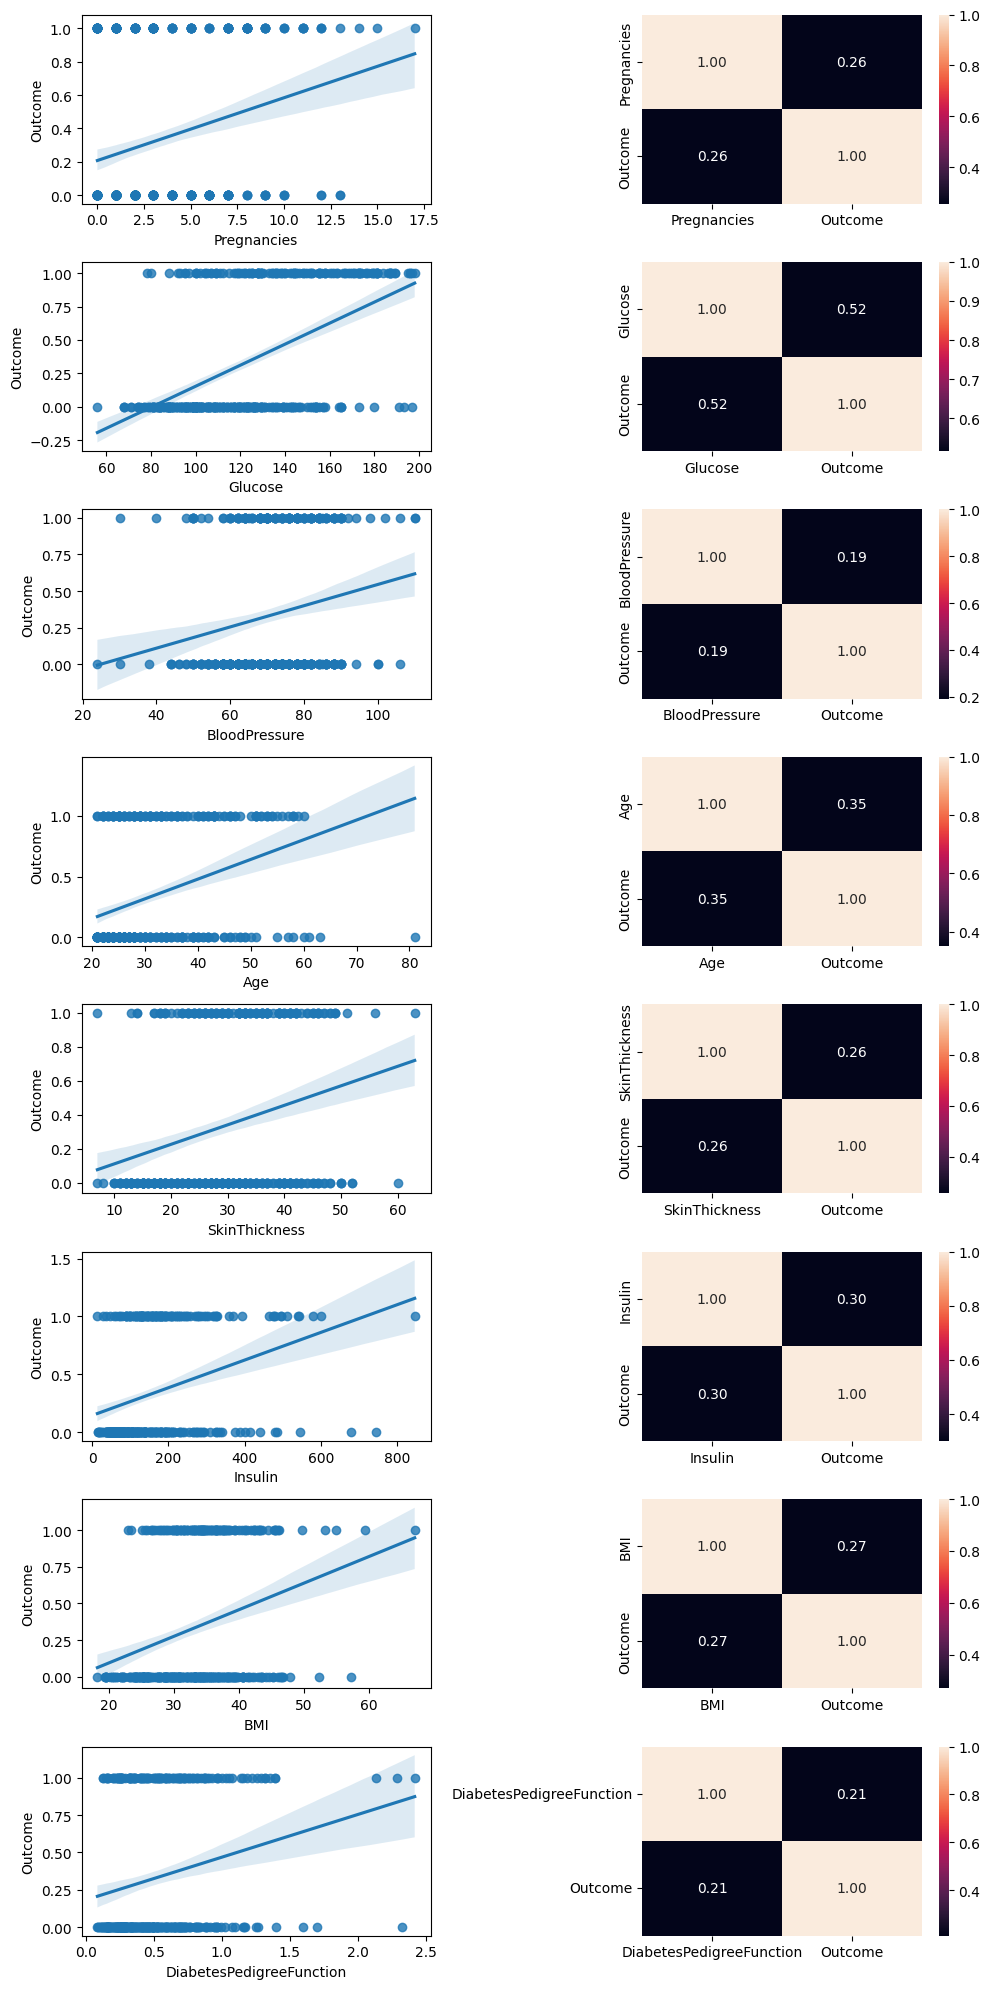

In [18]:
ig, axis = plt.subplots(8, 2, figsize = (10, 20))


sns.regplot(ax=axis[0,0], data= total_data, x= "Pregnancies", y= "Outcome")
sns.heatmap(total_data[["Pregnancies", "Outcome"]].corr(), annot= True, fmt= ".2f", ax= axis[0,1])

sns.regplot(ax=axis[1,0], data= total_data, x= "Glucose", y= "Outcome")
sns.heatmap(total_data[["Glucose", "Outcome"]].corr(), annot= True, fmt= ".2f", ax= axis[1,1])

sns.regplot(ax=axis[2,0], data= total_data, x= "BloodPressure", y= "Outcome")
sns.heatmap(total_data[["BloodPressure", "Outcome"]].corr(), annot= True, fmt= ".2f", ax= axis[2,1])

sns.regplot(ax=axis[3,0], data= total_data, x= "Age", y= "Outcome")
sns.heatmap(total_data[["Age", "Outcome"]].corr(), annot= True, fmt= ".2f", ax= axis[3,1])

sns.regplot(ax=axis[4,0], data= total_data, x= "SkinThickness", y= "Outcome")
sns.heatmap(total_data[["SkinThickness", "Outcome"]].corr(), annot= True, fmt= ".2f", ax= axis[4,1])

sns.regplot(ax=axis[5,0], data= total_data, x= "Insulin", y= "Outcome")
sns.heatmap(total_data[["Insulin", "Outcome"]].corr(), annot= True, fmt= ".2f", ax= axis[5,1])

sns.regplot(ax=axis[6,0], data= total_data, x= "BMI", y= "Outcome")
sns.heatmap(total_data[["BMI", "Outcome"]].corr(), annot= True, fmt= ".2f", ax= axis[6,1])

sns.regplot(ax=axis[7,0], data= total_data, x= "DiabetesPedigreeFunction", y= "Outcome")
sns.heatmap(total_data[["DiabetesPedigreeFunction", "Outcome"]].corr(), annot= True, fmt= ".2f", ax= axis[7,1])


plt.tight_layout()
plt.show()

- The variable most closely related to 'outcome' is clearly 'glucose' with a correlation of 0.52

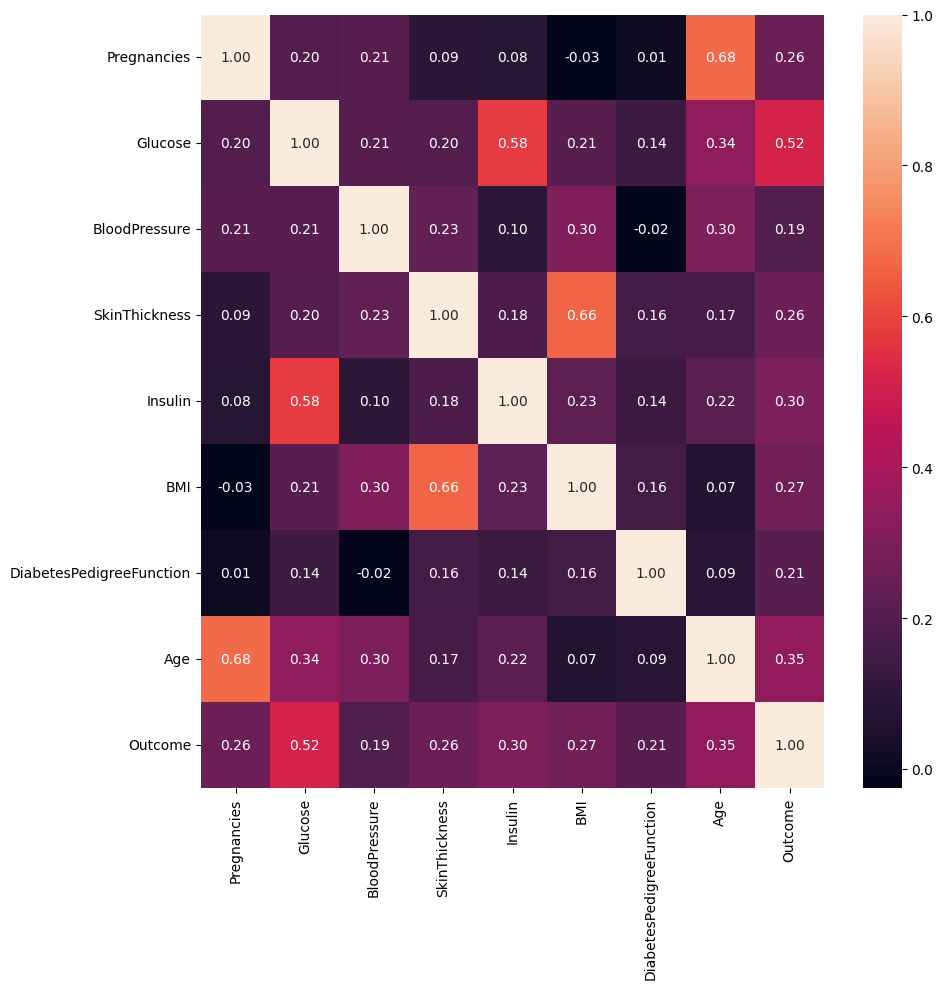

In [15]:
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(total_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

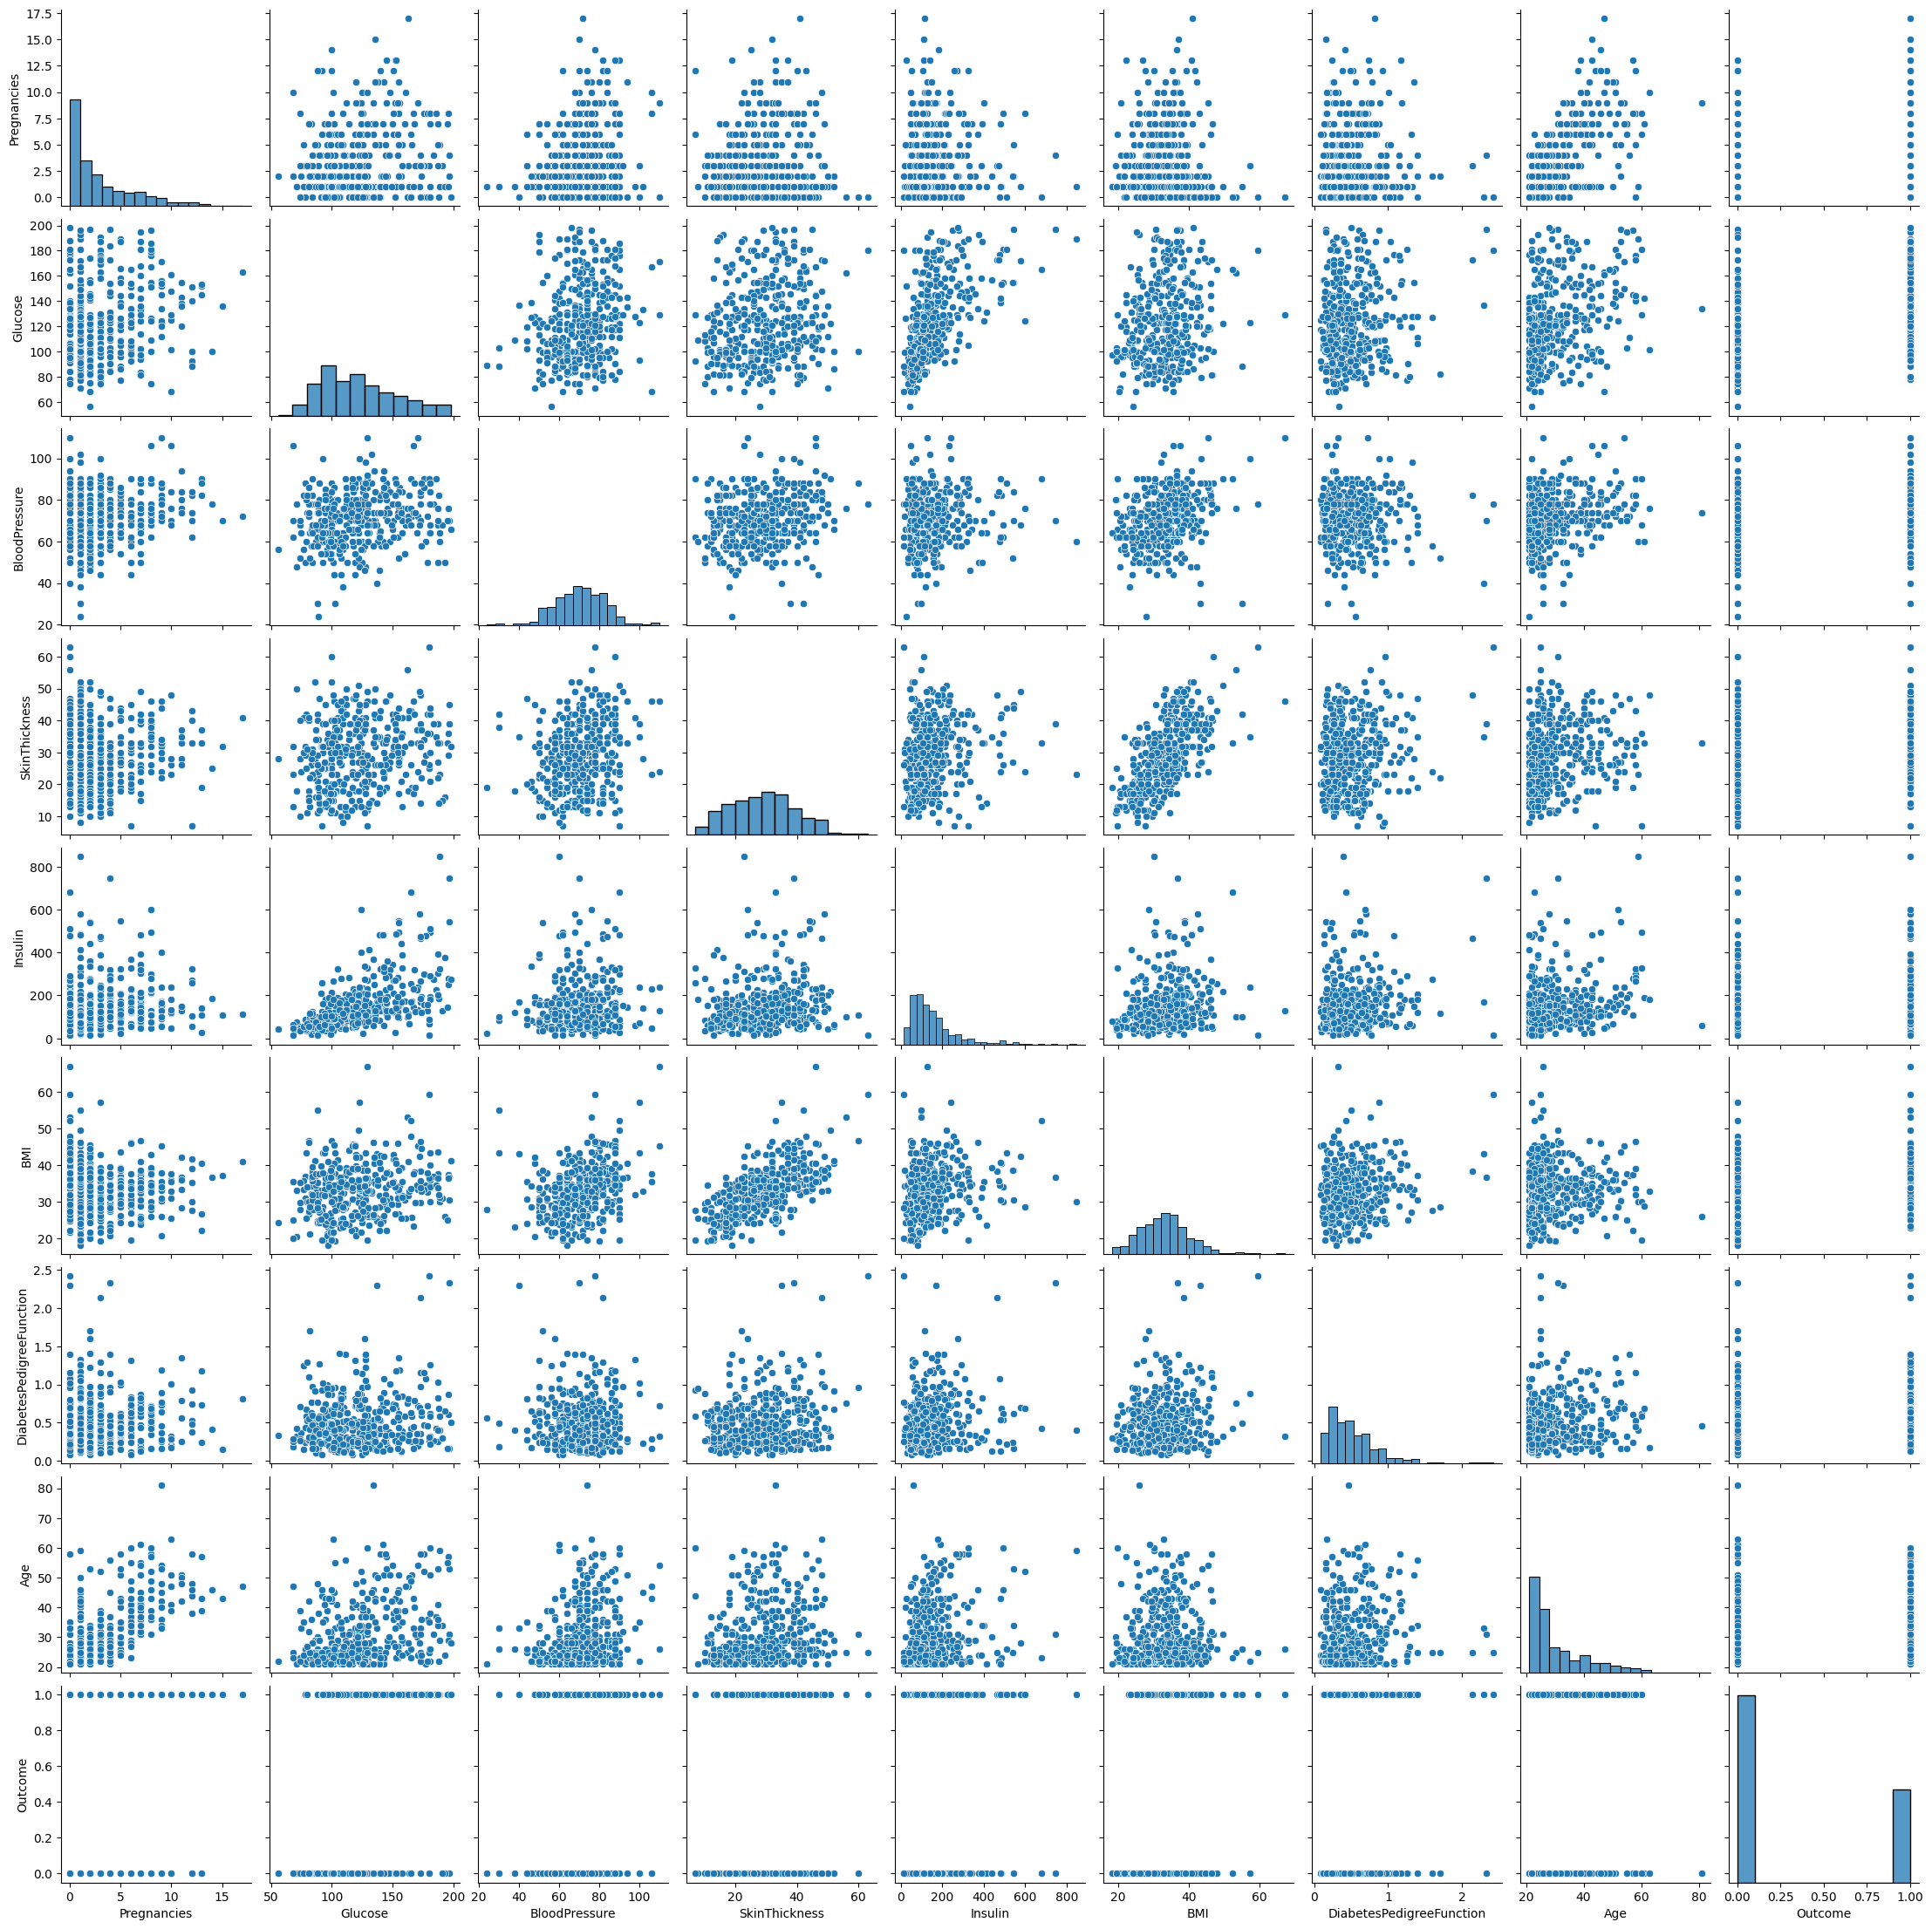

In [19]:
sns.pairplot(data = total_data)

## Feature Engineering

#### Outlier Analysis

In [11]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


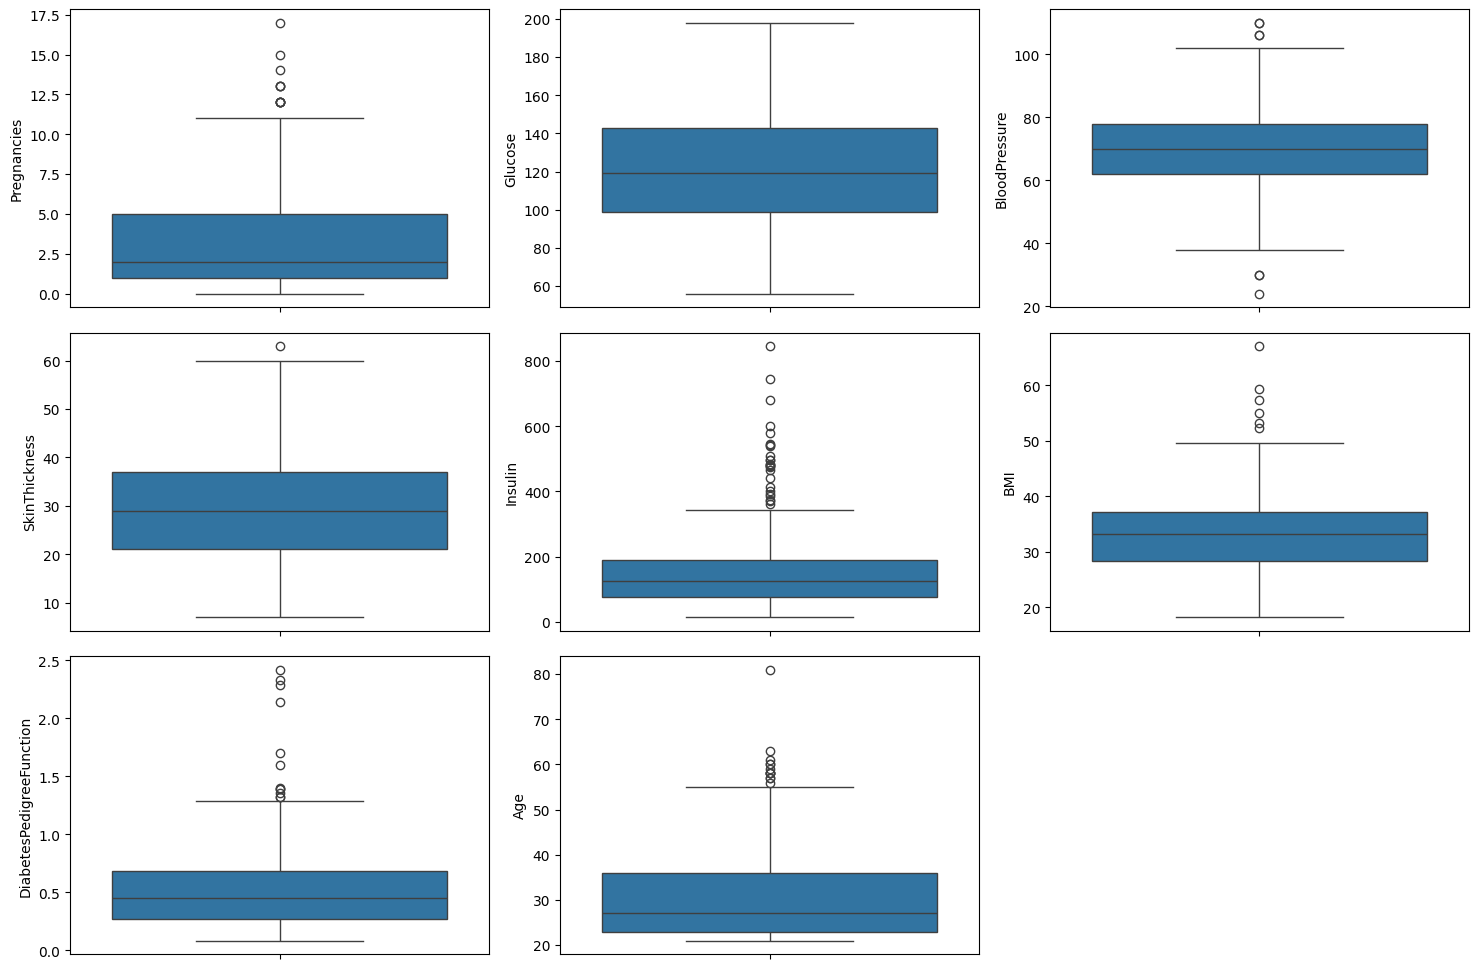

In [22]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Pregnancies")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Glucose")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "BloodPressure")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "SkinThickness")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "Insulin")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "BMI")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "Age")

plt.tight_layout()
fig.delaxes(axis[2,2])
plt.show()

In [12]:
#divide data with outliers and without

outliers_data = total_data.copy()
no_outliers_data = total_data.copy()

In [19]:
Pregnancies_stats = no_outliers_data["Pregnancies"].describe()
Pregnancies_iqr = Pregnancies_stats["75%"] - Pregnancies_stats["25%"]
upper_limit = Pregnancies_stats["75%"] + 1.5 * Pregnancies_iqr
lower_limit = Pregnancies_stats["25%"] - 1.5 * Pregnancies_iqr
lower_limit = 0
print(f"Upper limit = {round(upper_limit, 2)}\nLower limit = {round(lower_limit, 2)}\niqr = {round(Pregnancies_iqr, 2)}")

Upper limit = 11.0
Lower limit = 0
iqr = 4.0


In [22]:
Glucose_stats = no_outliers_data["Glucose"].describe()
Glucose_iqr = Glucose_stats["75%"] - Glucose_stats["25%"]
upper_limit = Glucose_stats["75%"] + 1.5 * Glucose_iqr
lower_limit = Glucose_stats["25%"] - 1.5 * Glucose_iqr
#lower_limit = 0
print(f"Upper limit = {round(upper_limit, 2)}\nLower limit = {round(lower_limit, 2)}\niqr = {round(Glucose_iqr, 2)}")

Upper limit = 209.0
Lower limit = 33.0
iqr = 44.0


In [23]:
BloodPressure_stats = no_outliers_data["BloodPressure"].describe()
BloodPressure_iqr = BloodPressure_stats["75%"] - BloodPressure_stats["25%"]
upper_limit = BloodPressure_stats["75%"] + 1.5 * BloodPressure_iqr
lower_limit = BloodPressure_stats["25%"] - 1.5 * BloodPressure_iqr
#lower_limit = 0
print(f"Upper limit = {round(upper_limit, 2)}\nLower limit = {round(lower_limit, 2)}\niqr = {round(BloodPressure_iqr, 2)}")

Upper limit = 102.0
Lower limit = 38.0
iqr = 16.0


In [25]:
SkinThickness_stats = no_outliers_data["SkinThickness"].describe()
SkinThickness_iqr = SkinThickness_stats["75%"] - SkinThickness_stats["25%"]
upper_limit = SkinThickness_stats["75%"] + 1.5 * SkinThickness_iqr
lower_limit = SkinThickness_stats["25%"] - 1.5 * SkinThickness_iqr
lower_limit = 0
print(f"Upper limit = {round(upper_limit, 2)}\nLower limit = {round(lower_limit, 2)}\niqr = {round(SkinThickness_iqr, 2)}")

Upper limit = 61.0
Lower limit = 0
iqr = 16.0


In [27]:
Insulin_stats = no_outliers_data["Insulin"].describe()
Insulin_iqr = Insulin_stats["75%"] - Insulin_stats["25%"]
upper_limit = Insulin_stats["75%"] + 1.5 * Insulin_iqr
lower_limit = Insulin_stats["25%"] - 1.5 * Insulin_iqr
lower_limit = 0
print(f"Upper limit = {round(upper_limit, 2)}\nLower limit = {round(lower_limit, 2)}\niqr = {round(Insulin_iqr, 2)}")

Upper limit = 359.88
Lower limit = 0
iqr = 113.25


In [28]:
BMI_stats = no_outliers_data["BMI"].describe()
BMI_iqr = BMI_stats["75%"] - BMI_stats["25%"]
upper_limit = BMI_stats["75%"] + 1.5 * BMI_iqr
lower_limit = BMI_stats["25%"] - 1.5 * BMI_iqr
#lower_limit = 0
print(f"Upper limit = {round(upper_limit, 2)}\nLower limit = {round(lower_limit, 2)}\niqr = {round(BMI_iqr, 2)}")

Upper limit = 50.15
Lower limit = 15.35
iqr = 8.7


In [30]:
DiabetesPedigreeFunction_stats = no_outliers_data["DiabetesPedigreeFunction"].describe()
DiabetesPedigreeFunction_iqr = DiabetesPedigreeFunction_stats["75%"] - DiabetesPedigreeFunction_stats["25%"]
upper_limit = DiabetesPedigreeFunction_stats["75%"] + 1.5 * DiabetesPedigreeFunction_iqr
lower_limit = DiabetesPedigreeFunction_stats["25%"] - 1.5 * DiabetesPedigreeFunction_iqr
lower_limit = 0
print(f"Upper limit = {round(upper_limit, 2)}\nLower limit = {round(lower_limit, 2)}\niqr = {round(DiabetesPedigreeFunction_iqr, 2)}")

Upper limit = 1.31
Lower limit = 0
iqr = 0.42


In [31]:
Age_stats = no_outliers_data["Age"].describe()
Age_iqr = Age_stats["75%"] - Age_stats["25%"]
upper_limit = Age_stats["75%"] + 1.5 * Age_iqr
lower_limit = Age_stats["25%"] - 1.5 * Age_iqr
#lower_limit = 0
print(f"Upper limit = {round(upper_limit, 2)}\nLower limit = {round(lower_limit, 2)}\niqr = {round(Age_iqr, 2)}")

Upper limit = 55.5
Lower limit = 3.5
iqr = 13.0


In [ ]:
#imputation values

